### Задание 1.

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [94]:
import scipy.stats as stats
import numpy as np
import matplotlib 

Общее число спортсменов

In [95]:
n_1=8;
n_2=9;
n_3=11;
n=n_1+n_2+n_3;
print(n);

28


Количество их групп

In [96]:
k=3;

Рост футболистов:


In [97]:
y1=np.array([173, 175, 180, 178, 177, 185, 183, 182],dtype=np.float64)

Рост хоккеистов

In [98]:
y2=np.array([177, 179, 180,188, 177, 172, 171, 184, 180],dtype=np.float64)

Рост штангистов

In [99]:
y3=np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170],dtype=np.float64)

Построим графики для наглядности:

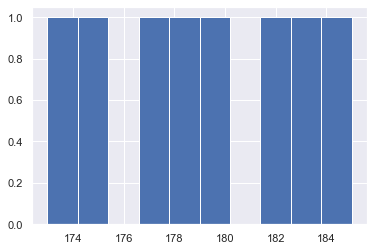

In [100]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
norm_data = y1
plt.hist(norm_data)
plt.show()

Проверим на нормальность:

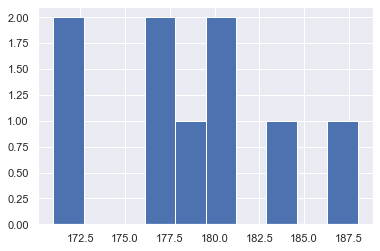

In [101]:
plt.hist(y2)
plt.show()

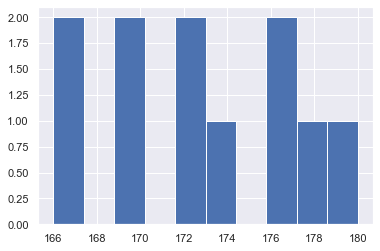

In [102]:
plt.hist(y3)
plt.show()

Проведем однофакторный дисперсионный анализ. Сначала найдем средние зарплаты для каждой профессии:

In [103]:
y1_mean=np.mean(y1)
print(y1_mean)

179.125


In [104]:
y2_mean=np.mean(y2)
print(y2_mean)

178.66666666666666


In [105]:
y3_mean=np.mean(y3)
print(y3_mean)

172.72727272727272


Средний рост разный. Это отличие статически значимо. Соберем все в один массив

In [106]:
y_all=np.concatenate([y1, y2, y3])
y_all

array([173., 175., 180., 178., 177., 185., 183., 182., 177., 179., 180.,
       188., 177., 172., 171., 184., 180., 172., 173., 169., 177., 166.,
       180., 178., 177., 172., 166., 170.])

Найдем среднее значение роста спортсмена

In [107]:
y_mean = np.mean(y_all)
print(y_mean)

176.46428571428572


Найдем $S^2$ — сумму квадратов отклонений наблюдений от общего среднего:

In [108]:
s2 = np.sum((y_all - y_mean)**2)
s2

830.9642857142854

Найдем $S^2_F$ - сумму квадратов отклонений средних групповых значений от общего среднего:

In [109]:
s2_f = ((y1_mean - y_mean)**2) * n_1 + ((y2_mean - y_mean)**2) * n_2 + ((y3_mean - y_mean)**2) * n_3
s2_f

253.9074675324678

Найдем $S^2_{ост}$ — остаточную сумму квадратов отклонений:

In [110]:
s2_residual = np.sum((y1 - y1_mean)**2) + np.sum((y2 - y2_mean)**2) + np.sum((y3 - y3_mean)**2)
s2_residual

577.0568181818182

Удостоверимся, что соблюдается равенство $S^2 = S_F^2 + S_{ост}^2$:

In [111]:
print(s2)
print(s2_f + s2_residual)

830.9642857142854
830.964285714286


Найдем общую дисперсию:

In [112]:
sigma2_general = s2 / (n - 1)
sigma2_general

30.776455026455015

Найдем факторную дисперсию:

In [113]:
sigma2_f = s2_f / (k - 1)
sigma2_f

126.9537337662339

Найдем остаточную дисперсию

In [114]:
sigma2_residual = s2_residual / (n - k)
sigma2_residual

23.08227272727273

Вычислим $F_H$:

In [115]:
F_h = sigma2_f / sigma2_residual
F_h

5.500053450812598

Найдем значение $F_{крит}$ в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости $\alpha = 0.05$ и двух степеней свободы: 

$df_{межд} = k - 1 = 3 - 1 = 2$ и $df_{внутр} = n - k = 28 - 3 = 25$.

Для данных значений $F_{крит} = 3.39$. Так как $F_H > F_{крит}$, отвергнута гипотеза Н0, различие средний рост спортсменов в трех группах статистически значимо.

### Задание2. Проанализируйте набор данных «Авто-мили», чтобы выяснить, насколько переменные похожи друг на друга.

Загрузите набор данных auto-mpg из ~ / наборов данных / auto-mpg /
Проверить нулевую гипотезу, отклонять или не отклонять нулевую гипотезу.

1. Гипотезы:

Independent variable: origin

Dependent variable: mpg

$ H_o: $ Существенных различий в милях среди транспортных средств различного происхождения не существует.

$ H_1: $ Существенная разница существует в милях среди транспортных средств различного происхождения.
 
 2. 
 
Independent variable: origin

Independent variable: horsepower

Dependent variable: mpg

$ H_o: $ Существенных различий в милях среди транспортных средств различного происхождения не существует.

$ H_1: $ Существенная разница существует в милях среди транспортных средств различного происхождения.



In [116]:
import pandas as pd
import numpy as np

data_auto=pd.read_csv('auto-mpg.csv')
data_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


Есть одна зависимая переменная - mpg(миль за галлон (американская измерительная единица)) и одна независимая переменная - origin

Найдем колличество всех участвующих компонентов *n*

In [117]:
n=data_auto.origin.count()
n

398

Сгруппируем по группе *origin*

In [118]:
data_auto.groupby('origin').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
origin,,,,,,,,
1,249,249,249,249,249,249,249,249
2,70,70,70,70,70,70,70,70
3,79,79,79,79,79,79,79,79


In [119]:
n1 = data_auto.groupby('origin').mpg.apply(list).values[0]
n1_count=data_auto.groupby('origin').count()['mpg'].values[0]
n1_count

249

In [120]:
n2 = data_auto.groupby('origin').mpg.apply(list).values[1]
n2_count=data_auto.groupby('origin').count()['mpg'].values[1]
n2_count

70

In [121]:
n3 = data_auto.groupby('origin').mpg.apply(list).values[2]
n3_count=data_auto.groupby('origin').count()['mpg'].values[2]
n3_count

79

Проведен однофакторный дисперсионный анализ.

In [122]:
n1_mean = np.mean(n1)
print(n1_mean)

20.083534136546184


In [123]:
n2_mean = np.mean(n2)
print(n2_mean)

27.89142857142857


In [124]:
n3_mean = np.mean(n3)
print(n3_mean)

30.450632911392404


Можно видеть, что средние значения *mpg* разняться. Установим, что это статистически значимо. Соберем все в один массив.

In [125]:
n_all=np.concatenate([n1, n2, n3])
n_all

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 22. , 18. , 21. , 21. , 10. , 10. , 11. ,  9. ,
       28. , 25. , 19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. ,
       12. , 13. , 13. , 18. , 22. , 19. , 18. , 23. , 26. , 25. , 20. ,
       21. , 13. , 14. , 15. , 14. , 17. , 11. , 13. , 12. , 13. , 15. ,
       13. , 13. , 14. , 22. , 28. , 13. , 14. , 13. , 14. , 15. , 12. ,
       13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. , 18. , 23. ,
       11. , 12. , 13. , 12. , 18. , 21. , 19. , 21. , 15. , 16. , 15. ,
       11. , 20. , 21. , 19. , 15. , 26. , 25. , 16. , 16. , 18. , 16. ,
       13. , 14. , 14. , 14. , 28. , 19. , 18. , 15. , 15. , 16. , 15. ,
       16. , 14. , 17. , 16. , 15. , 18. , 21. , 20. , 13. , 23. , 20. ,
       23. , 18. , 19. , 25. , 26. , 17.5, 16. , 15.5, 14.5, 22. , 22. ,
       24. , 22.5, 29. , 24.5, 20. , 18. , 18.5, 17.5, 26.5, 13. , 16.5,
       13. , 13. , 13. , 30. , 25.5, 17.5, 17. , 15

Найдем среднее значение из всех

In [126]:
n_mean=np.mean(n_all)
n_mean

23.514572864321607

Найдем $S^2$ — сумму квадратов отклонений наблюдений от общего среднего:

In [127]:
s_2=np.sum((n_all-n_mean)**2)
s_2

24252.575477386934

Найдем $S^2_F$ - сумму квадратов отклонений средних групповых значений от общего среднего:

In [130]:
s2_f = ((n1_mean - n_mean)**2) * n1_count + ((n2_mean - n_mean)**2) * n2_count + ((n3_mean - n_mean)**2) * n3_count
s2_f

8072.820661929806

Найдем $S^2_{ост}$ — остаточную сумму квадратов отклонений:

In [132]:
s2_r = np.sum((n1 - n1_mean)**2) + np.sum((n2 - n2_mean)**2) + np.sum((n3 - n3_mean)**2)
s2_r

16179.754815457129

Удостоверимся, что соблюдается равенство $S^2 = S_F^2 + S_{ост}^2$:

In [133]:
print(s2_r+s2_f)
s_2

24252.575477386934


24252.575477386934

Найдем общую дисперсию

In [136]:
total_var=s_2/(n-1)
total_var

61.08961077427439

Найдем факторную дисперсию

In [137]:
fact_var=s2_f/(k-1)
fact_var

4036.410330964903

Найдем остаточную дисперсию

In [138]:
residual_var=s2_r/(n-k)
residual_var

40.961404596094

Вычислим $F_H$:

In [139]:
F_h=fact_var/residual_var
F_h

98.54179491075868

Найдем значение $F_{крит}$ в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости $\alpha = 0.05$ и двух степеней свободы: 

$df_{межд} = k - 1 = 3 - 1 = 2$ и $df_{внутр} = n - k = 28 - 3 = 395$.

Для данных значений $F_{крит} = 2.99$. Так как $F_H > F_{крит}$, отвергнута гипотеза Н0, различие средних зарплат в трех группах статистически значимо.

### Задание 3. Определить , какие выборки и  какой критерий использовать. 

1. Пример

Изучить, оказывает ли влияение новая недавно разработанная система электронной регистрации на прием к врачу на среднее время, проведенное пациентом в ожидании приема. Пусть есть две выборки  со средним временем ожидания приема за последний месяц в двух разных клиниках; в одной из них есть система электронной регистрации, а в другой – нет.

Ответ: Критерий Фишера

*Independet variable (независимая переменная)*: способ записи к врачу.

*Dependet variable (зависимая переменная)*: среднее время ожидания приема

$ H_o: $ Cущественных различий в влиянии системы эл.регистрации на время ожидания приема не существует

$ H_1: $ Существует различие влияния системы эл. регистрации на время ожидания приема


2. Пример

Для тестирования диеты набираются 15 человек. Их вес замеряется, а затем они подвергаются диете в течении некоторого времени, и их вес снова замеряется. С помощью статистических методов необходимо проверить, работает ли диета.

Ответ: Критерий Фишера

*Independet variable (независимая переменная)*: время измерения.

*Dependet variable (зависимая переменная)*: вес человека

$ H_o: $ Cущественных различий в влиянии времени, проведенной на диете и весом не существует

$ H_1: $ Существует различие влияния времени на диете и весом человека

3. Пример

Влияние витамина C на рост зубов морских свинок.
В эксперименте изучалось влияние витамина C на рост одонтобластов морских свинок. Рассматривалось три дозы витамина (0.5, 1 и 2 мг) и два способа его приёма (апельсиновый сок и аскорбиновая кислота). В каждой из 6 групп по уровням двух факторов были произведены измерения для 10 морских свинок.

Ответ: Критерий Фишера

*Independet variable (независимая переменная)*: дозы витамина (0.5, 1, 2)

*Independet variable (независимая переменная)*: способ приема (апельсиновый сок и аскорбиновая кислота)

*Dependet variable (зависимая переменная)*: рост зубов 

$ H_o: $ Cущественных различий в влиянии дозы витаминов и способах приема витамина С на рост зубов морских свинок не существует

$ H_1: $ Существует различие в влиянии дозы витаминов и способах приема витамина С на рост зубов морских свинок

4. Пример

Рост певцов хора
В 1979 году было опрошено 235 членов нью-йоркской ассоциации хорового пения, для каждого из них известен рост и регистр голоса. Меняется ли средний рост вместе с регистром?

*Independet variable (независимая переменная)*: регистр голоса.

*Dependet variable (зависимая переменная)*: средний рост

$ H_o: $ Cущественных различий в изменении среднего роста и регистра голоса не существует

$ H_1: $ Существует различие влияния среднего роста на регистра голоса